In [ ]:
!git clone "https://github.com/ChVimal/dove-classifier"
%cd dove-classifier
!bash join.bash
!rm -rf *.bash .git
%cd ..

Cloning into 'dove-classifier'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 4355 (delta 10), reused 2 (delta 0), pack-reused 4329
Receiving objects: 100% (4355/4355), 3.48 GiB | 33.00 MiB/s, done.
Resolving deltas: 100% (63/63), done.
Checking out files: 100% (4285/4285), done.
/content/dove-classifier
/content


In [ ]:
!git clone "https://github.com/ChVimal/bird-sounds"
%cd bird-sounds
!bash join.bash
!rm *.bash .git
%cd ..

Cloning into 'bird-sounds'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 3198 (delta 6), reused 0 (delta 0), pack-reused 3180
Receiving objects: 100% (3198/3198), 2.72 GiB | 33.69 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Checking out files: 100% (3167/3167), done.
/content/bird-sounds
rm: cannot remove '.git': Is a directory
/content


In [ ]:
!rm -rf other/.git/

In [ ]:
#renaming folder to Dove and Other

In [ ]:
#Keeping only 200 audios

In [ ]:
import os

In [ ]:
i=1
for r,d,f in os.walk('dove/'):
  for file in f:
    if(i>200):
      os.remove(r+file)
    i+=1

In [ ]:
i=1
for r,d,f in os.walk('other/'):
  for file in f:
    if(i>200):
      os.remove(r+file)
    i+=1

In [ ]:
!ls other/ | wc -l

200


In [ ]:
!pip install pydub

In [ ]:
from os import path
from pydub import AudioSegment

In [ ]:
path='dove/'
for r,d,f in os.walk(path):
  for file in f:
    file_name=file.split('.')
    src = r+file
    dst = r+file_name[0]+".wav"                                                       
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    os.remove(r+file)

In [ ]:
path='other/'
for r,d,f in os.walk(path):
  for file in f:
    file_name=file.split('.')
    src = r+file
    dst = r+file_name[0]+".wav"                                                       
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    os.remove(r+file)

In [ ]:
!ls dove/ | wc -l

200


In [ ]:
!ls other/ | wc -l

200


In [ ]:
import pandas as pd

In [ ]:
import os
i=0
f_name=[]
label=[]
path='/content/dove/'
for r,d,f in os.walk(path):
  for file in f:
    f_name.append(file)
    label.append('dove')

In [ ]:
path='/content/other/'
for r,d,f in os.walk(path):
  for file in f:
    f_name.append(file)
    label.append('other')

In [ ]:
df= pd.DataFrame(list(zip(f_name,label)), 
               columns =['fname','label']) 

In [ ]:
df

,fname,label
0,214702_XC214702-barred-cuckoo-dove1.wav,dove
1,116404_XC116404-magna_sept%202009_Pantar-FV.wav,dove
2,568844_XC568844-200615-004_N6_19h51_Sturtur.wav,dove
3,85433_TARMAJ17.wav,dove
4,486909_XC486909-YerutiComun.wav,dove
...,...,...
395,415068_XC415068-Default%20Project.wav,other
396,384049_XC384049-GMCLAC_6176-FRaven.wav,other
397,196420_XC196420-Spilornis_rufipectus_nom-FL%20...,other
398,398513_XC398513-141025_0178_EasternChanting_Ts...,other


In [ ]:
!mkdir dataset

In [ ]:
!cp -r dove/* dataset/

In [ ]:
!ls dataset/ | wc -l

200


In [ ]:
!cp -r other/* dataset/

In [ ]:
!ls dataset/ | wc -l

400


In [ ]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=a50e179c8af380280520296271a7b2d6bb2d267b5f0e0206cc1f513ab2ad7dff
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [ ]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa
from keras.utils import to_categorical
from keras.layers import Conv2D,MaxPooling2D,Flatten,LSTM
from keras.layers import Dropout, Dense, TimeDistributed
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

In [ ]:
def envelope(y,rate, threshold):
  mask=[]
  y = pd.Series(y).apply(np.abs)
  y_mean=y.rolling(window=int(rate/10), min_periods=1, center=True).mean()
  for mean in y_mean:
    if mean>threshold:
      mask.append(True)
    else:
      mask.append(False)
  return mask

In [ ]:
df.set_index('fname',inplace=True)

In [ ]:
for f in df.index:
  rate, signal =  wavfile.read('dataset/'+f)
  df.at[f, 'length'] = signal.shape[0]/rate

In [ ]:
df

,label,length
fname,,
214702_XC214702-barred-cuckoo-dove1.wav,dove,23.863729
116404_XC116404-magna_sept%202009_Pantar-FV.wav,dove,50.155102
568844_XC568844-200615-004_N6_19h51_Sturtur.wav,dove,74.771338
85433_TARMAJ17.wav,dove,43.755102
486909_XC486909-YerutiComun.wav,dove,81.380000
...,...,...
415068_XC415068-Default%20Project.wav,other,39.464792
384049_XC384049-GMCLAC_6176-FRaven.wav,other,24.313021
196420_XC196420-Spilornis_rufipectus_nom-FL%20flight%20Tambun%2020Aug14%208.wav,other,30.014694


In [ ]:
classes= list(np.unique(df.label))

In [ ]:
class_dist = df.groupby(['label'])['length'].mean()

In [ ]:
class_dist

label
dove     41.269994
other    39.582056
Name: length, dtype: float64

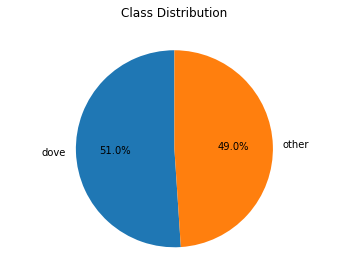

In [ ]:
fig,ax = plt.subplots()
ax.set_title('Class Distribution',y=1.08)
ax.pie(class_dist,labels=class_dist.index,autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()
df.reset_index(inplace=True)

In [ ]:
!mkdir clean

In [ ]:
import numpy as np

In [ ]:
def calc_fft(y,rate):
  n = len(y)
  freq = np.fft.rfftfreq(n, d=1/rate)
  Y = abs(np.fft.rfft(y)/n)
  return (Y, freq)


In [ ]:
signals= {}
fft = {}
fbank ={}
mfccs = {}
for c in classes:
  wav_file = df[df.label == c].iloc[0,0]
  signal, rate = librosa.load('dataset/'+wav_file, sr=44100)
  mask=envelope(signal,rate, 0.0005)
  signal=signal[mask]
  signals[c] = signal
  fft[c] = calc_fft(signal, rate)
  
  bank = logfbank(signal[:rate],rate,nfilt=26,nfft=1103).T
  fbank[c]=bank
  mel=mfcc(signal[:rate],rate,numcep=13, nfilt=26, nfft=1103).T
  mfccs[c]=mel

In [ ]:
#Downsampling
if len(os.listdir('clean')) ==0:
  for f in tqdm(df.fname):
    signal, rate=librosa.load('dataset/'+f,sr=16000)
    mask=envelope(signal,rate,0.0005)
    wavfile.write(filename='clean/'+f,rate=rate,data=signal[mask])

100%|██████████| 400/400 [14:08<00:00,  2.12s/it]


#Modeling

In [ ]:
!mkdir models
!mkdir pickles

In [ ]:
n_samples=2*int(df['length'].sum()/0.1)
prob_dist=class_dist/class_dist.sum()
choices=np.random.choice(class_dist.index,p = prob_dist)

In [ ]:
prob_dist

label
dove     0.510438
other    0.489562
Name: length, dtype: float64

In [ ]:
import pickle

In [ ]:
class Config:
  def __init__(self,mode='conv',nfilt=26,nfeat=13,nfft=512,rate=16000):
    self.mode=mode
    self.nfilt=nfilt
    self.nfeat=nfeat
    self.nfft=nfft
    self.rate=rate
    self.step=int(rate/10)
    self.p_path=os.path.join('/content/pickles',mode+'.p')

In [ ]:
def check_data():
  if os.path.isfile(config.p_path):
    print("Loading existing mode")
    with open(config.p_path,'rb') as handle:
      tmp = pickle.load(handle)
      return tmp
  else:
    return None

In [ ]:
def build_rand_feat():
  tmp=check_data()
  if tmp:
    return tmp.data[0], tmp.data[1]
  X=[]
  y=[]
  _min,_max=float('inf'),-float('inf')
  for _ in tqdm(range(n_samples)):
    rand_class=np.random.choice(class_dist.index,p=prob_dist)
    file=np.random.choice(df[df.label==rand_class].index)
    rate,wav=wavfile.read('clean/'+df.fname[file])
    label=df.at[file,'label']
    rand_index=np.random.randint(0,wav.shape[0]-config.step)
    sample=wav[rand_index:rand_index+config.step]
    X_sample = mfcc(sample,rate,numcep=config.nfeat,nfilt=config.nfilt,nfft=config.nfft)
    _min=min(np.amin(X_sample), _min)
    _max=max(np.amax(X_sample), _max)
    X.append(X_sample)
    y.append(classes.index(label))
  config.min=_min
  config.max=_max
  X, y = np.array(X), np.array(y)
  X=(X-_min)/(_max-_min)
  if config.mode=='conv':
    X=X.reshape(X.shape[0],X.shape[1],X.shape[2],1)
  y=to_categorical(y,num_classes=2)
  config.data=(X,y)
  with open(config.p_path,'wb') as handle:
    pickle.dump(config,handle,protocol=2)
  return X,y


In [ ]:
def get_conv_model():
  model=Sequential()
  model.add(Conv2D(16, (3,3), activation='relu', strides=(1,1),
                   padding='same',input_shape=input_shape))
  model.add(Conv2D(32, (3,3), activation='relu', strides=(1,1),
                   padding='same'))
  model.add(Conv2D(64, (3,3), activation='relu', strides=(1,1),
                   padding='same'))
  model.add(Conv2D(128, (3,3), activation='relu', strides=(1,1),
                   padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  model.summary()
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['acc'])
  return model

In [ ]:
config = Config(mode='conv')

In [ ]:
if config.mode=='conv':
  x,y=build_rand_feat()
  y_flat=np.argmax(y,axis=1)
  input_shape=(x.shape[1],x.shape[2],1)

100%|██████████| 323408/323408 [19:25<00:00, 277.44it/s]


In [ ]:
model=get_conv_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 9, 13, 16)         160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 13, 32)         4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 13, 64)         18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 13, 128)        73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 6, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0

In [70]:
best_model_file = "convnet.h5"
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose=1, save_best_only=True)

In [66]:
!mv pickles /content/drive/My\ Drive/Capstone

In [71]:
model.fit(x,y,epochs=10, batch_size=32,
          shuffle=True, validation_split=0.2, verbose=1,callbacks=[best_model])

Epoch 1/10
8086/8086 [==============================] - ETA: 0s - loss: 0.1951 - acc: 0.9201
Epoch 00001: val_acc improved from -inf to 0.92087, saving model to convnet.h5
8086/8086 [==============================] - 70s 9ms/step - loss: 0.1951 - acc: 0.9201 - val_loss: 0.1953 - val_acc: 0.9209
Epoch 2/10
8083/8086 [============================>.] - ETA: 0s - loss: 0.1798 - acc: 0.9274
Epoch 00002: val_acc improved from 0.92087 to 0.94453, saving model to convnet.h5
8086/8086 [==============================] - 70s 9ms/step - loss: 0.1798 - acc: 0.9274 - val_loss: 0.1414 - val_acc: 0.9445
Epoch 3/10
8086/8086 [==============================] - ETA: 0s - loss: 0.1649 - acc: 0.9338
Epoch 00003: val_acc improved from 0.94453 to 0.94784, saving model to convnet.h5
8086/8086 [==============================] - 70s 9ms/step - loss: 0.1649 - acc: 0.9338 - val_loss: 0.1338 - val_acc: 0.9478
Epoch 4/10
8083/8086 [============================>.] - ETA: 0s - loss: 0.1556 - acc: 0.9384
Epoch 00004: 